In [1]:
# Import packages
%reset -f
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, get_loss_plot, plot_loss
import numpy as np
import cv2

In [2]:
def prep_data(data_path):
    '''
    --------------------
    Prepare data
    Use vectorized flatten
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Load
    X_train, y_train, X_dev, y_dev, X_test, y_test = load_all_data(data_path)
    
    # Flatten
    X_train_flattened = vectorized_flatten(X_train)
    X_dev_flattened = vectorized_flatten(X_dev)
    X_test_flattened = vectorized_flatten(X_test)
    
    # Reshape labels
    y_train = y_train.reshape(1, -1)
    y_dev = y_dev.reshape(1, -1)
    y_test = y_test.reshape(1, -1)
    
    # Return
    return(X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test)

In [3]:
def initialize(X): 
    '''
    --------------------
    Parameter Initialization
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X [n = 12000])
    --------------------
    Output: 
    weights: Weight terms initialized as random normals
    biases: Bias terms initialized to zero
    --------------------
    '''
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(h2, h1)
    
    dim3 = 1/np.sqrt(W2.shape[1])
    W3 = dim3 * np.random.randn(1, h2)

    b1 = np.zeros((h1, 1))
    b2 = np.zeros((h2, 1))
    b3 = np.zeros((1, 1))
    
    weights = (W1, W2, W3)
    biases = (b1, b2, b3)
    
    return weights, biases

In [4]:
def forward_pass(X, weights, biases):
    '''
    ----------------------------------
    Forward propogation:
    Send inputs through the network to
    generate output
    ----------------------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    weights: Binary (1/0) training label (shape = n X 1)
    biases:
    --------------------
    Output: 
    activations: vector of results from passing
    inputs through each neuron
    --------------------
    '''
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    
    z3 = W3 @ a2 + b3
    a3 = sigmoid(z3)
    
    activations = (z1, a1, z2, a2, z3, a3)
    
    return activations

In [5]:
def backpropagation(X, y, weights, biases, activations):
    '''
    --------------------
    Backpropagation
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/0) training label (shape = n X 1)
    weights: Current set of weights
    biases: Current set of biases
    activations: Current set of activations
    --------------------
    Output: 
    Derivatives required
    for optimization update
    --------------------
    '''
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    z1, a1, z2, a2, z3, a3 = activations
    m = max(y.shape)
    # print(m)
    
    dz3 = (a3 - y)/m
    # print("dz3", dz3.shape)
    
    dW3 = np.dot(dz3, a2.T)
    # print("dW3", dW3.shape)
    
    db3 = np.sum(dz3, axis=1).reshape(-1, 1)
    # print("db3", db3.shape)
    
    da2 = np.dot(W3.T, dz3)
    # print("da2", da2.shape)
    
    dz2 = da2 * sigmoid_derivative(z2)
    # print("dz2", dz2.shape)
    
    dW2 = np.dot(dz2, a1.T)
    # print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)
    # print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    # print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    # print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)
    # print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)
    # print("db1", db1.shape)
    
    return db1, dW1, db2, dW2, db3, dW3

In [6]:
def update_parameters(weights, biases, gradients, learning_rate):
    '''
    --------------------
    Update parameters
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    
    db1, dW1, db2, dW2, db3, dW3 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
    W3 = gradient_update(W3, learning_rate, dW3)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    b3 = gradient_update(b3, learning_rate, db3)
    
    weights = (W1, W2, W3)
    biases = (b1, b2, b3)
    
    return weights, biases

In [7]:
def finite_differences(example, truth, weights, biases, delta_h=1e-9):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    
    I, J = W3.shape # Change here
    
    deltaW = np.zeros((I, J))
    
    activations = forward_pass(example, weights, biases)
    db1, dW1, db2, dW2, db3, dW3 = backpropagation(example, truth, weights, biases, activations)
    
    for i in range(I):
        for j in range(J):
    
            W_plus = np.copy(W3) # Change here
            W_minus = np.copy(W3) # Change here
            
            W_plus[i][j] += delta_h
            W_minus[i][j] -= delta_h
            
            weights_plus = [W1, W2, W_plus] # Change here
            weights_minus = [W1, W2, W_minus] # Change here
            
            activations_plus = forward_pass(example, weights_plus, biases)
            activations_minus = forward_pass(example, weights_minus, biases)

            loss_plus = get_log_loss(truth, activations_plus[-1])
            loss_minus =  get_log_loss(truth, activations_minus[-1])

            deltaW[i][j] = (loss_plus - loss_minus)/(2 * delta_h)

    difference = np.linalg.norm(dW3 - deltaW) # Change here
    
    return dW3, deltaW, difference, activations_plus[-1], activations_minus[-1] # Change here

In [8]:
def run_finite_differences(data_path, idx=10):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)
    weights, biases = initialize(X_train_flattened)

    dW, deltaW, difference, activations_plus, activations_minus = finite_differences(X_train_flattened[:, idx].reshape(-1, 1), 
                                                                  y_train[:, idx].reshape(-1, 1), weights, biases)
    
    print("dW", dW)
    print("deltaW", deltaW)
    print("difference", difference)
    print(activations_plus, activations_minus)
    
    return(dW, deltaW, difference, activations_plus, activations_minus)
    
    

In [9]:
def train(data_path, h1, h2, lr, epochs):    
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Get data
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)

    # Initialize weights
    weights, biases = initialize(X_train_flattened)
    
    # Initialize history object
    history = {
        "weights": [weights],
        "losses": [], 
        "biases": [biases],
        "accuracies": []
    }
    
    # Do this for the specified epochs
    for epoch in range(epochs):
        
        # Get weights and bias iterables
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        
        # Forward pass to get activations
        activations = forward_pass(X_train_flattened, weights, biases)
        
        # Backward pass to get gradients
        gradients = backpropagation(X_train_flattened, y_train, weights, biases, activations)
        
        # Gradient descent update
        weights, biases = update_parameters(weights, biases, gradients, lr)
    
        # Get last layer output
        y_prob = activations[-1]
        
        # Threshold
        y_pred = np.where(y_prob > 0.5, 1, 0)
    
        # Get loss and accuracy results
        loss = get_log_loss(y_train, y_prob)
        accuracy = get_accuracy(y_train, y_pred)
    
        # Append results to history
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["weights"].append(weights)
        history["accuracies"].append(accuracy)
        
        # Stop training if numerical loss underflows
        if np.isnan(loss): 
            break
        
        # Display loss for monitoring
        print(loss)
    
    # Return statement
    return(history)

In [10]:
def get_best_results(history):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    best_epoch = np.array(history["losses"][:-1]).argmin()
    
    print(f"best accuracy: {history['accuracies'][best_epoch]}")
    print(f"best loss: {history['losses'][best_epoch]}")
    print(f"best epoch: {best_epoch}")
    
    return(best_epoch)

In [11]:
def get_dev_results(history, best_epoch):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)
    
    weights = history["weights"][best_epoch]
    biases = history["biases"][best_epoch]
    activations = forward_pass(X_dev_flattened, weights, biases)

    y_dev_prob = activations[-1]
    y_dev_pred = np.where(y_dev_prob > 0.5, 1, 0)

    loss = get_log_loss(y_dev, y_dev_prob)
    accuracy = get_accuracy(y_dev, y_dev_pred)
    print(f"Dev set accuracy: {accuracy}")
    
    return(accuracy)

In [12]:
def execute_pipeline(data_path, idx, h1, h2, lr, epochs):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Set seed for reproducible results
    np.random.seed(1252908)
    
    # Check finite difference
    dW, deltaW, difference, activations_plus, activations_minus = run_finite_differences(data_path, idx=10)
    
    # Now enter training loop
    training_history = train(data_path, h1, h2, lr, epochs)
    
    # Display plots to monitor whether loss functions are correct shape
    plot_loss("loss.png", training_history["losses"][:-2])
    
    
    # Plot accuracy
    plot_loss("accuracy.png", training_history["accuracies"][:-2], label='Training Accuracy')
    
    # Get weights and biases from best training epoch
    best_training_epoch = get_best_results(training_history)
    
    # Get dev results
    get_dev_results(training_history, best_training_epoch)

In [13]:
# Set path to data
data_path = '../setup/data'

In [14]:
# Set no. of observations to use for checking finite differences
idx = 10

In [15]:
# Set perceptron parameters: architecture, learning rate, and no. of training epochs
h1 = 8
h2 = 4
lr = 0.1
epochs = 2000

dW [[-0.18303023 -0.17351476 -0.17373708 -0.1751518 ]]
deltaW [[-0.18303023 -0.17351479 -0.17373702 -0.1751517 ]]
difference 1.1720561891713362e-07
[[0.64527729]] [[0.64527729]]
8340.578837459205
8338.23442724519
8336.133734421255
8334.250089532667
8332.559734704526
8331.041507295013
8329.676557536126
8328.448096590677
8327.341171812715
8326.34246632464
8325.44012031997
8324.62357176849
8323.883414442262
8323.211271399026
8322.599682255845
8322.042002762277
8321.532315340977
8321.065349405708
8320.636410394301
8320.241316568205
8319.876342732447
8319.53817012118
8319.223841775718
8318.930722814854
8318.656465062544
8318.398975556105
8318.156388510055
8317.927040357092
8317.709447528876
8317.502286676292
8317.304377061588
8317.114664884086
8316.932209327308
8316.75617013848
8316.585796572239
8316.42041754865
8316.259432892217
8316.10230553312
8315.948554564948
8315.797749064837
8315.649502592247
8315.503468291747
8315.359334533503
8315.216821032309
8315.075675392598
8314.935670032595
83

6875.5366486002185
6860.28095275162
6844.93978269333
6829.51401621551
6814.004542545072
6798.412261523948
6782.738082773072
6766.9829248436545
6751.147714357301
6735.23338513674
6719.24087732884
6703.171136521763
6687.025112858134
6670.803760146102
6654.508034970335
6638.138895804914
6621.697302130235
6605.184213556012
6588.600588952525
6571.947385592322
6555.225558304529
6538.436058644062
6521.579834077945
6504.657827191029
6487.67097491338
6470.62020777159
6453.506449166358
6436.330614678528
6419.093611405919
6401.796337333144
6384.439680736668
6367.024519627264
6349.551721232061
6332.022141518255
6314.436624760573
6296.796003154479
6279.101096477064
6261.352711797495
6243.551643238818
6225.69867179278
6207.794565189347
6189.840077822344
6171.835950732671
6153.782911650331
6135.68167509643
6117.53294254614
6099.337402653504
6081.095731538748
6062.8085931386795
6044.476639620493
6026.100511859182
6007.680839978539
5989.218243955504
5970.713334287474
5952.166712721875
5933.578973047159

1884.8129472985972
1882.5311881936727
1880.2621930171706
1878.0058630627125
1875.7621005284602
1873.5308085078468
1871.3118909804057
1869.1052528026964
1866.9107996993318
1864.728438254097
1862.5580759011666
1860.3996209164156
1858.2529824088253
1856.1180703119787
1853.9947953756493
1851.883069157483
1849.7828040147656
1847.6939130962826
1845.6163103342644
1843.5499104364214
1841.4946288780636
1839.450381894305
1837.4170864723546
1835.3946603438897
1833.383021977511
1831.3820905712805
1829.391786045342
1827.4120290346195
1825.4427408815932
1823.4838436291602
1821.5352600135657
1819.5969134574152
1817.668728062763
1815.7506286042715
1813.8425405224486
1811.9443899169605
1810.0561035400103
1808.1776087897956
1806.3088337040322
1804.4497069535519
1802.6001578359678
1800.760116269408
1798.9295127863188
1797.1082785273356
1795.2963452352174
1793.4936452488503
1791.7001114973154
1789.9156774940204
1788.1402773308946
1786.3738456726464
1784.6163177510875
1782.8676293595113
1781.1277168471383


1437.2422164306251
1436.7701248244944
1436.298979864799
1435.828776961218
1435.359511545998
1434.891179073842
1434.4237750217974
1433.957294889149
1433.4917341973119
1433.0270884897275
1432.56335333176
1432.100524310596
1431.6385970351464
1431.1775671359492
1430.7174302650733
1430.2581820960272
1429.7998183236668
1429.3423346641057
1428.8857268546296
1428.429990653608
1427.9751218404122
1427.5211162153337
1427.0679695995032
1426.615677834813
1426.1642367838404
1425.713642329773
1425.2638903763373
1424.814976847726
1424.3668976885303
1423.919648863672
1423.4732263583378
1423.0276261779165
1422.5828443479363
1422.1388769140044
1421.695719941749
1421.2533695167629
1420.8118217445472
1420.371072750459
1419.93111867966
1419.491955697065
1419.0535799872946
1418.6159877546293
1418.1791752229622
1417.7431386357578
1417.3078742560083
1416.8733783661944
1416.4396472682458
1416.0066772835048
1415.574464752689
1415.1430060358584
1414.7122975123823
1414.2823355809073
1413.8531166593277
1413.4246371

1283.1352441558417
1282.8609102784703
1282.5867936363677
1282.3128936195524
1282.039209620104
1281.765741032162
1281.4924872519225
1281.2194476776367
1280.946621709607
1280.6740087501846
1280.4016082037676
1280.1294194767972
1279.8574419777542
1279.5856751171573
1279.3141183075581
1279.0427709635387
1278.7716325017084
1278.5007023407
1278.2299799011655
1277.9594646057737
1277.6891558792058
1277.4190531481504
1277.149155841302
1276.879463389355
1276.6099752249997
1276.34069078292
1276.0716094997872
1275.8027308142568
1275.5340541669639
1275.2655790005183
1274.9973047595006
1274.7292308904584
1274.4613568419004
1274.1936820642923
1273.9262060100527
1273.658928133547
1273.391847891085
1273.1249647409136
1272.8582781432133
1272.591787560093
1272.325492455586
1272.0593922956432
1271.7934865481297
1271.5277746828192
1271.2622561713888
1270.9969304874146
1270.7317971063653
1270.4668555055987
1270.202105164355
1269.9375455637535
1269.6731761867848
1269.408996518308
1269.1450060450438
1268.8812

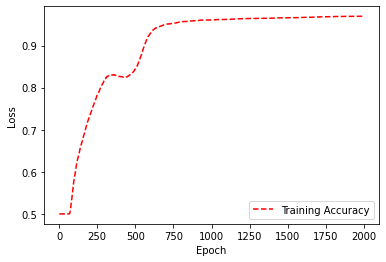

In [16]:
# Execute pipeline
execute_pipeline(data_path, idx, h1, h2, lr, epochs)